## CalCOFI Harmful Algae Blooms Data Visualization

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# combines all worksheets into a single df
raw_df = pd.concat(pd.read_excel("/Users/annaliu/Downloads/calcofi_1996_2012_3.xlsx", 
                             sheet_name = None))
raw_df

Cruise  Month  Year     Date  Quadrant  316  399  600   30  \
CC96DATA 0  CalCOFI 9608      8    96  08/1/96        NE  0.0  0.0  0.0  0.0   
         1  CalCOFI 9608      8    96  08/1/96        SE  0.0  0.0  0.0  0.0   
         2  CalCOFI 9608      8    96  08/1/96     Alley  0.0  0.0  0.0  0.0   
         3  CalCOFI 9608      8    96  08/1/96  Offshore  0.0  0.0  0.0  0.0   
         4  CalCOFI 9610     10    96  10/1/96        NE  0.0  0.0  0.0  0.0   
...                  ...    ...   ...      ...       ...  ...  ...  ...  ...   
CC12DATA 3  CalCOFI 1202      2    12  02/1/12  Offshore  0.0  0.0  0.0  0.0   
         4  CalCOFI 1203      3    12  03/1/12        NE  0.0  0.0  0.0  7.9   
         5  CalCOFI 1203      3    12  03/1/12        SE  0.0  0.0  0.0  0.0   
         6  CalCOFI 1203      3    12  03/1/12     Alley  0.0  0.0  0.0  7.9   
         7  CalCOFI 1203      3    12  03/1/12  Offshore  0.0  0.0  0.0  0.0   

             499  ...     337  523  335  230  40  334  231  597  234  \
CC96DATA 0   0.0  ...  1412.3  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         1   0.0  ...   171.4  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         2  45.3  ...   816.0  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         3   0.0  ...     0.0  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         4   0.0  ...   333.1  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
...          ...  ...     ...  ...  ...  ...  ..  ...  ...  ...  ...   
CC12DATA 3   0.0  ...     0.0  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         4   0.0  ...    39.5  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         5   0.0  ...   488.2  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         6   0.0  ...     0.0  0.0  0.0  0.0   0  0.0  0.0    0  0.0   
         7   0.0  ...   220.3  0.0  0.0  0.0   0  0.0  0.0    0  0.0   

            SUM MISC. TAXA  
CC96DATA 0          1647.7  
         1           832.4  
         2          2176.0  
         3           477.4  
         4           832.7  
...                    ...  
CC12DATA 3            23.9  
         4           513.9  
         5           906.7  
         6             0.0  
         7           392.7  

[256 rows x 392 columns]

In [4]:
# array of all column names
column_names = raw_df.columns.values

In [5]:
# sum of species by cruise number (yr, month) regardless of quadrant
sum_by_cruise = raw_df.groupby("Cruise").sum()
sum_by_cruise_df = sum_by_cruise.get(["SUM CENTRIC DIATOMS", "SUM PENNATE DIATOMS", "SUM THECATE DINOFLAGELLATES", 
                  "SUM ATHECATE DINOFLAGELLATES", "SUM COCCOLITHOPHORIDS","SUM SILICOFLAGELLATES", "SUM MISC. TAXA"])

In [6]:
# got position of first cruise position in the 1900s to rearrange df (so don't have to hardcode)
df_1900s = sum_by_cruise_df[sum_by_cruise_df.index.str.contains("CalCOFI 9")]
first_1900s_cruise = df_1900s.index[0] # "CalCOFI 9608"
first_1900s_cruise_position = sum_by_cruise_df.index.get_loc(first_1900s_cruise)

49

In [7]:
# updated df (rearranged so time makes sense)
df_1900s = sum_by_cruise_df[first_1900s_cruise_position:]
df_2000s = sum_by_cruise_df[:first_1900s_cruise_position]
sum_by_cruise_df = pd.concat([df_1900s, df_2000s])
sum_by_cruise_df

,SUM CENTRIC DIATOMS,SUM PENNATE DIATOMS,SUM THECATE DINOFLAGELLATES,SUM ATHECATE DINOFLAGELLATES,SUM COCCOLITHOPHORIDS,SUM SILICOFLAGELLATES,SUM MISC. TAXA
Cruise,,,,,,,
CalCOFI 9608,36619.4,44354.6,2377.7,3901.2,8219.8,2.0,5133.5
CalCOFI 9610,27916.1,12785.1,1840.3,4323.8,14589.8,187.5,2937.3
CalCOFI 9702,22947.4,14172.8,2667.2,2970.3,13013.2,129.3,2045.9
CalCOFI 9704,151153.9,188494.1,1431.3,2482.6,20236.2,14.7,4892.6
CalCOFI 9707,86251.9,101977.6,5774.9,9584.1,29098.1,278.5,8109.9
...,...,...,...,...,...,...,...
CalCOFI 1104,29776.5,24970.0,7904.1,1868.3,33075.3,5.8,5409.6
CalCOFI 1108,56232.3,78871.7,6093.4,10428.9,37922.7,0.0,7592.1
CalCOFI 1110,7995.6,11893.3,1319.8,2622.8,11655.8,75.0,54689.6


Text(0.5, 1.0, 'Species Abundance Over Time')

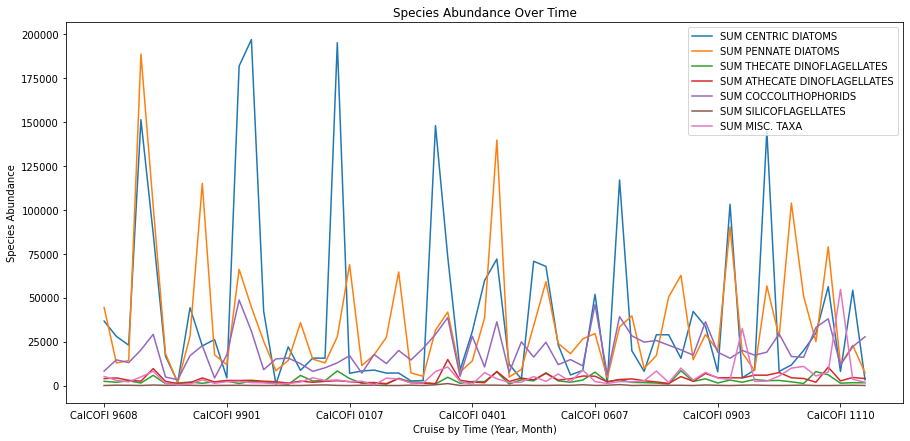

In [8]:
# line plot showing species abundance over time
abundance_over_time = sum_by_cruise_df.plot(kind = "line", figsize = (15, 7))
abundance_over_time.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")
plt.title("Species Abundance Over Time")

In [11]:
# initial df to use for all species
species_abundance = raw_df.get(["Cruise", "Quadrant", "SUM CENTRIC DIATOMS", "SUM PENNATE DIATOMS", "SUM THECATE DINOFLAGELLATES", 
            "SUM ATHECATE DINOFLAGELLATES", "SUM COCCOLITHOPHORIDS","SUM SILICOFLAGELLATES", 
            "SUM MISC. TAXA"])
species_abundance

Cruise  Quadrant  SUM CENTRIC DIATOMS  SUM PENNATE DIATOMS  \
CC96DATA 0  CalCOFI 9608        NE              16967.2              12024.2   
         1  CalCOFI 9608        SE                126.6               1668.9   
         2  CalCOFI 9608     Alley              19402.5              29421.2   
         3  CalCOFI 9608  Offshore                123.1               1240.3   
         4  CalCOFI 9610        NE               7348.3               3975.8   
...                  ...       ...                  ...                  ...   
CC12DATA 3  CalCOFI 1202  Offshore                139.7                737.2   
         4  CalCOFI 1203        NE                711.5               3131.0   
         5  CalCOFI 1203        SE                130.6               2702.6   
         6  CalCOFI 1203     Alley               2300.9               1130.7   
         7  CalCOFI 1203  Offshore                 91.0                220.2   

            SUM THECATE DINOFLAGELLATES  SUM ATHECATE DINOFLAGELLATES  \
CC96DATA 0                       1255.4                         372.7   
         1                        249.1                        1081.2   
         2                        453.3                        1360.0   
         3                        419.9                        1087.3   
         4                        270.6                         624.5   
...                                 ...                           ...   
CC12DATA 3                        270.9                         446.3   
         4                        735.3                        1660.5   
         5                        287.6                         523.1   
         6                        284.5                        1328.4   
         7                        234.6                         431.0   

            SUM COCCOLITHOPHORIDS  SUM SILICOFLAGELLATES  SUM MISC. TAXA  
CC96DATA 0                 1642.3                    0.0          1647.7  
         1                 1810.1                    0.0           832.4  
         2                  816.0                    0.0          2176.0  
         3                 3951.4                    2.0           477.4  
         4                  395.5                   83.3           832.7  
...                           ...                    ...             ...  
CC12DATA 3                 4139.8                    8.0            23.9  
         4                 4981.3                    0.0           513.9  
         5                10025.5                    8.7           906.7  
         6                 6025.1                    7.9             0.0  
         7                 6680.1                    0.0           392.7  

[256 rows x 9 columns]

In [12]:
# 1. SUM CENTRIC DIATOMS

In [13]:
# get only scd and all its quadrants
only_scd = species_abundance.get(["Cruise", "Quadrant", "SUM CENTRIC DIATOMS"])
scd_NE = only_scd[only_scd.get("Quadrant") == "NE"]
scd_SE = only_scd[only_scd.get("Quadrant") == "SE"]
scd_alley = only_scd[only_scd.get("Quadrant") == "Alley"]
scd_offshore = only_scd[only_scd.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

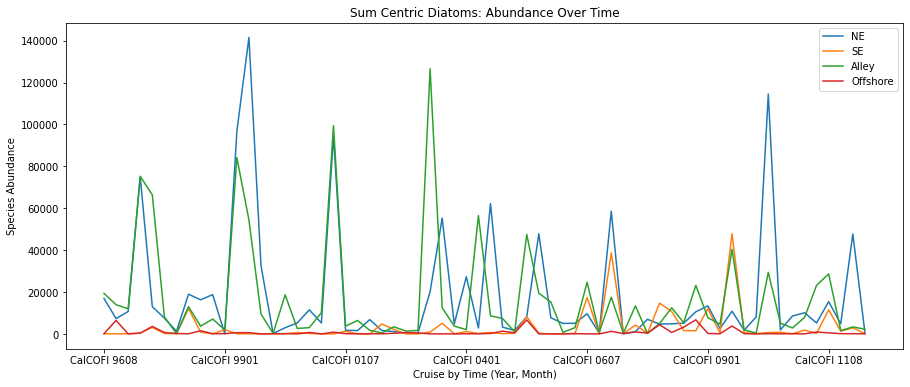

In [14]:
# overlay of 4 scd plots
scd_NE = scd_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
scd_SE = scd_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = scd_NE)
scd_alley = scd_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = scd_NE)
scd_offshore = scd_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = scd_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Centric Diatoms: Abundance Over Time")
scd_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [15]:
# 2. SUM PENNATE DIATOMS

In [16]:
# get only spd and all its quadrants
only_spd = species_abundance.get(["Cruise", "Quadrant", "SUM PENNATE DIATOMS"])
spd_NE = only_spd[only_spd.get("Quadrant") == "NE"]
spd_SE = only_spd[only_spd.get("Quadrant") == "SE"]
spd_alley = only_spd[only_spd.get("Quadrant") == "Alley"]
spd_offshore = only_spd[only_spd.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

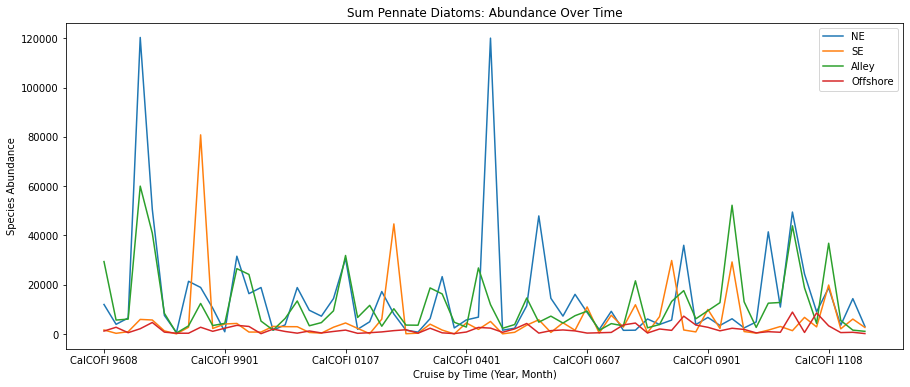

In [17]:
# overlay of 4 spd plots
spd_NE = spd_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
spd_SE = spd_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = spd_NE)
spd_alley = spd_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = spd_NE)
spd_offshore = spd_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = spd_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Pennate Diatoms: Abundance Over Time")
spd_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [18]:
# 3. SUM THECATE DINOFLAGELLATES

In [19]:
# get only std and all its quadrants
only_std = species_abundance.get(["Cruise", "Quadrant", "SUM THECATE DINOFLAGELLATES"])
std_NE = only_std[only_std.get("Quadrant") == "NE"]
std_SE = only_std[only_std.get("Quadrant") == "SE"]
std_alley = only_std[only_std.get("Quadrant") == "Alley"]
std_offshore = only_std[only_std.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

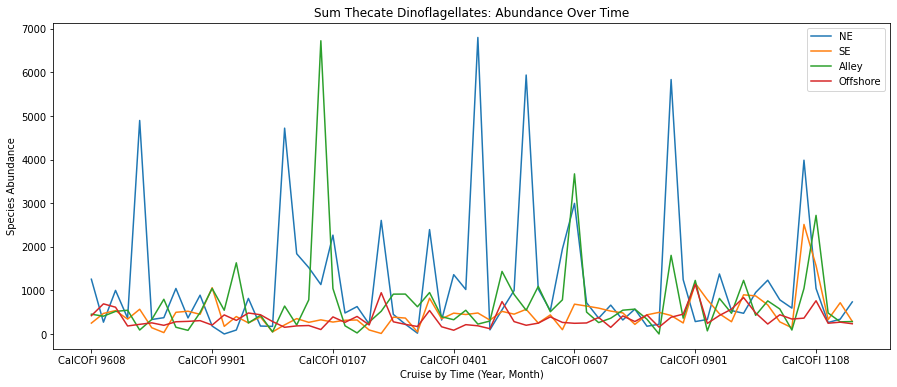

In [20]:
# overlay of 4 std plots
std_NE = std_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
std_SE = std_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = std_NE)
std_alley = std_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = std_NE)
std_offshore = std_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = std_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Thecate Dinoflagellates: Abundance Over Time")
std_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [21]:
# 4. SUM ATHECATE DINOFLAGELLATES

In [22]:
# get only sad and all its quadrants
only_sad = species_abundance.get(["Cruise", "Quadrant", "SUM ATHECATE DINOFLAGELLATES"])
sad_NE = only_sad[only_sad.get("Quadrant") == "NE"]
sad_SE = only_sad[only_sad.get("Quadrant") == "SE"]
sad_alley = only_sad[only_sad.get("Quadrant") == "Alley"]
sad_offshore = only_sad[only_sad.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

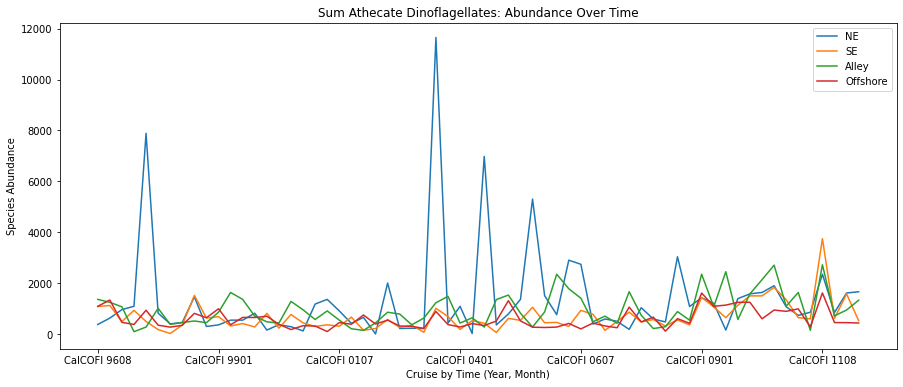

In [23]:
# overlay of 4 sad plots
sad_NE = sad_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
sad_SE = sad_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sad_NE)
sad_alley = sad_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sad_NE)
sad_offshore = sad_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sad_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Athecate Dinoflagellates: Abundance Over Time")
sad_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [24]:
# 5. SUM COCCOLITHOPHORIDS

In [25]:
# get only sc and all its quadrants
only_sc = species_abundance.get(["Cruise", "Quadrant", "SUM COCCOLITHOPHORIDS"])
sc_NE = only_sc[only_sc.get("Quadrant") == "NE"]
sc_SE = only_sc[only_sc.get("Quadrant") == "SE"]
sc_alley = only_sc[only_sc.get("Quadrant") == "Alley"]
sc_offshore = only_sc[only_sc.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

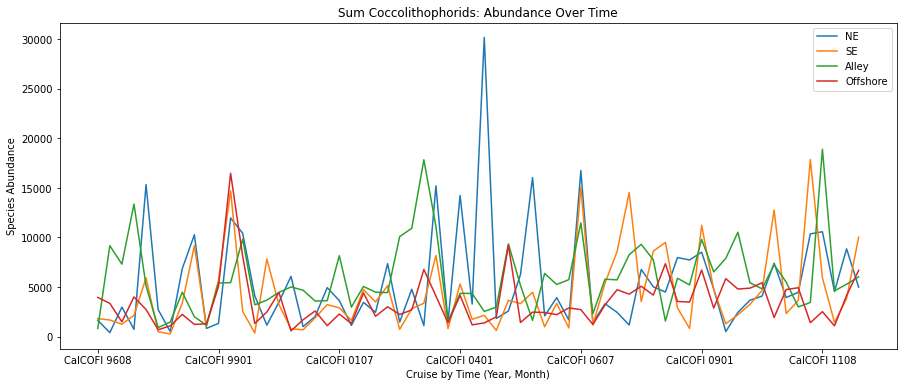

In [26]:
# overlay of 4 sc plots
sc_NE = sc_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
sc_SE = sc_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sc_NE)
sc_alley = sc_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sc_NE)
sc_offshore = sc_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = sc_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Coccolithophorids: Abundance Over Time")
sc_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [27]:
# 6. SUM SILICOFLAGELLATES

In [28]:
# get only ss and all its quadrants
only_ss = species_abundance.get(["Cruise", "Quadrant", "SUM SILICOFLAGELLATES"])
ss_NE = only_ss[only_ss.get("Quadrant") == "NE"]
ss_SE = only_ss[only_ss.get("Quadrant") == "SE"]
ss_alley = only_ss[only_ss.get("Quadrant") == "Alley"]
ss_offshore = only_ss[only_ss.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

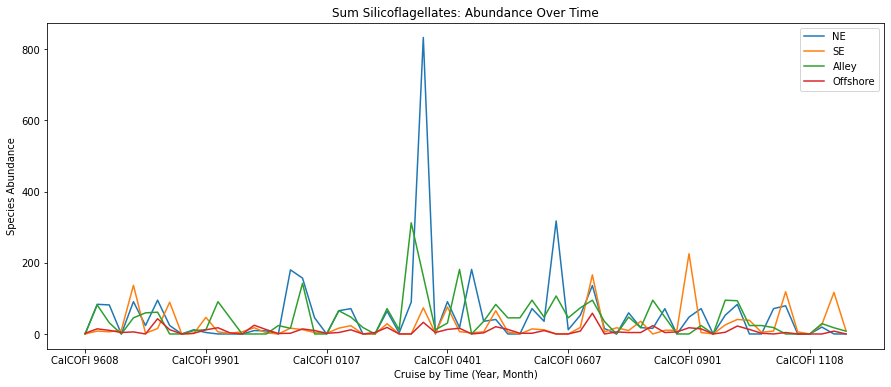

In [29]:
# overlay of 4 ss plots
ss_NE = ss_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
ss_SE = ss_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = ss_NE)
ss_alley = ss_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = ss_NE)
ss_offshore = ss_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = ss_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Silicoflagellates: Abundance Over Time")
ss_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")

In [30]:
# 7. SUM MISC. TAXA

In [31]:
# get only mt and all its quadrants
only_mt = species_abundance.get(["Cruise", "Quadrant", "SUM MISC. TAXA"])
mt_NE = only_mt[only_mt.get("Quadrant") == "NE"]
mt_SE = only_mt[only_mt.get("Quadrant") == "SE"]
mt_alley = only_mt[only_mt.get("Quadrant") == "Alley"]
mt_offshore = only_mt[only_mt.get("Quadrant") == "Offshore"]

[Text(0.5, 0, 'Cruise by Time (Year, Month)'),
 Text(0, 0.5, 'Species Abundance')]

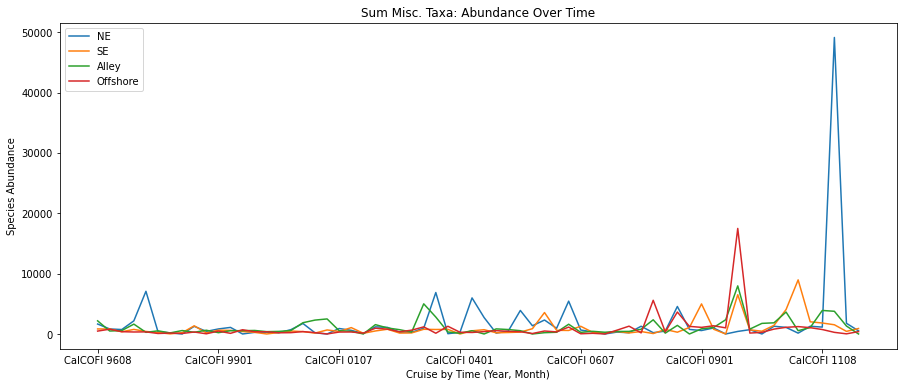

In [32]:
# overlay of 4 mt plots
mt_NE = mt_NE.plot(kind = "line", figsize = (15, 6),  x = "Cruise")
mt_SE = mt_SE.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = mt_NE)
mt_alley = mt_alley.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = mt_NE)
mt_offshore = mt_offshore.plot(kind = "line", figsize = (15, 6), x = "Cruise", ax = mt_alley)

plt.legend(["NE", "SE", "Alley", "Offshore"])
plt.title("Sum Misc. Taxa: Abundance Over Time")
mt_offshore.set(xlabel = "Cruise by Time (Year, Month)", ylabel = "Species Abundance")